In [283]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy.optimize import curve_fit
from scipy import stats
from scipy import optimize
from scipy.special import factorial
from scipy.stats import poisson
from scipy.stats import gaussian_kde

In [293]:
def kde_scipy(x, x_grid, bandwidth=0.1, **kwargs):
    """Kernel Density Estimation with Scipy"""
    # Note that scipy weights its bandwidth by the covariance of the
    # input data.  To make the results comparable to the other methods,
    # we divide the bandwidth by the sample standard deviation here.
    kde = gaussian_kde(x, bw_method=bandwidth, **kwargs)
    return kde.evaluate(x_grid)

In [309]:
Excel=pd.ExcelFile("Datos/practica1Avanzado.xlsx")
Excel.sheet_names

['Hoja1',
 'Conteos_Distribución',
 'Conteos_Distancia_doble',
 'Conteos_Distancia_una',
 'Voltaje',
 'Exp_Voltaje_VS_Conteos',
 'intensidad',
 'Hoja2',
 'Conteos_intensidad']

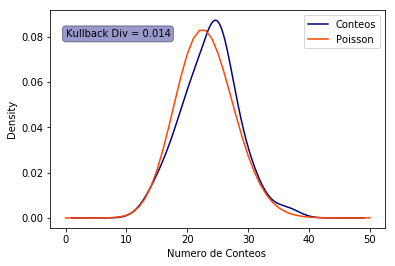

In [322]:
conteos=pd.read_excel(Excel,sheet_name='Conteos_Distribución')

cuentas_verde=np.array(conteos["conteo filtro verde doble rendija en el medio"].dropna())

cuentas_verde=np.append(cuentas_verde,np.random.poisson(23,50))

datos=pd.DataFrame({"Conteos":cuentas_verde}) 

ax=datos.plot(kind="kde",c="navy")
#datos.hist(density=True,ax=ax,bins=10,grid=False)
dist=poisson(23)
n=np.linspace(0,50,51)
plt.plot(n,dist.pmf(n),label="Poisson",c="orangered")
plt.xlabel("Numero de Conteos ")
plt.legend()
plt.text(0,0.08,"Kullback Div = {}".format(round((dist.pmf(sorted(cuentas_verde)) * np.log(dist.pmf(sorted(cuentas_verde))/kde_scipy(sorted(cuentas_verde),sorted(cuentas_verde),bandwidth="silverman"))).sum(),3)),
        bbox=dict(facecolor='navy', alpha=0.4,boxstyle="round"))

plt.savefig("Figuras/Distribucion.png")
plt.show()

0.014157036332447203

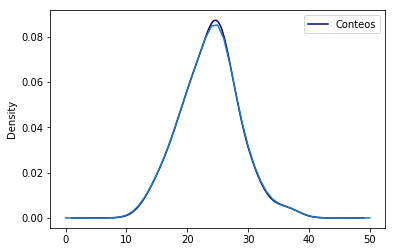

In [324]:
ax=datos.plot(kind="kde",c="navy")
plt.plot(n,kde_scipy(sorted(cuentas_verde),n,"silverman"))

(dist.pmf(sorted(cuentas_verde)) * np.log(dist.pmf(sorted(cuentas_verde))/kde_scipy(sorted(cuentas_verde),sorted(cuentas_verde),bandwidth="silverman"))).sum()

In [247]:
cuentas_verde

array([25., 26., 25., 21., 24., 25., 27., 23., 27., 26., 25., 28., 25.,
       26., 21., 19., 21., 15., 21., 22., 21., 26., 25., 23., 24., 20.,
       24., 22., 21., 23., 34., 22., 21., 28., 26., 29., 33., 20., 18.,
       22., 28., 19., 23., 18., 21., 26., 32., 26., 21., 28., 28., 15.,
       25., 25., 29., 16., 28., 24., 16., 30., 20., 27., 35., 27., 36.,
       20., 20., 30., 23., 23., 28., 33., 23., 22., 29., 18., 27., 33.,
       34., 20., 21., 25., 22., 25., 20., 23., 25., 19., 31., 18., 19.,
       23., 22., 20., 21., 26., 27., 21., 30., 20., 22., 28., 25., 18.,
       25., 24., 19., 21., 31., 18.])

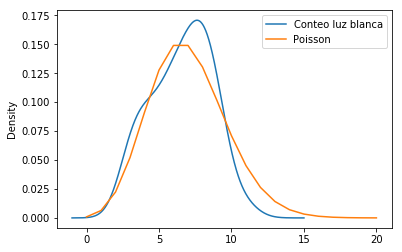

In [219]:
conteos["Conteo luz blanca"].plot(kind="kde")
dist=poisson(7)
n=np.linspace(0,20,21)
plt.plot(n,dist.pmf(n),label="Poisson")
plt.legend()

plt.show()

In [325]:
conteos=pd.read_excel(Excel,sheet_name='Conteos_intensidad')
mean=conteos.groupby("intensidad ").mean().reset_index()
mean.columns=["Intensidad","Mean"]
mean_sqrt=np.sqrt(conteos.groupby("intensidad ").mean()).reset_index()
mean_sqrt.columns=["Intensidad","Mean sqrt"]
std=conteos.groupby("intensidad ").std().reset_index()
std.columns=["Intensidad","Std"]
total=pd.merge(mean,std,on="Intensidad")
total=pd.merge(total,mean_sqrt,on="Intensidad")
total["Log std"]=np.log(total["Std"])

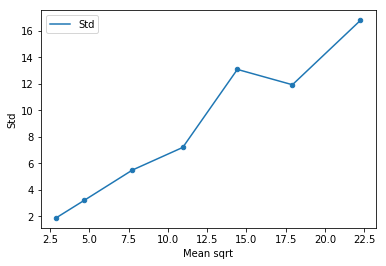

In [326]:
ax=total.iloc[:-2].plot("Mean sqrt","Std",kind="scatter")
total.iloc[:-2].plot("Mean sqrt","Std",ax=ax)
plt.show()

In [327]:
sqrt_mean=np.array(total["Mean sqrt"].iloc[:-2])
Std=np.array(total["Std"].iloc[:-2])

In [328]:
def model(x,a,b):
    return a*x+b

In [329]:
x_obs=sqrt_mean
y_obs=Std
x=np.linspace(min(x_obs),max(x_obs))
popt, pcov = curve_fit(model, x_obs, y_obs)
perr = np.sqrt(np.diag(pcov))
R_2=np.abs(pcov[1,0]/np.sqrt(pcov[0,0]*pcov[1,1]))

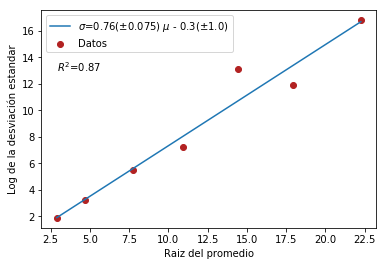

In [330]:
plt.scatter(sqrt_mean,Std,color="firebrick",label="Datos")
#total.plot("Mean sqrt","Log std",ax=ax)
plt.plot(x,model(x,popt[0],popt[1]),label=r"$\sigma$={}($\pm${}) $\mu$ {} {}($\pm${})".format(round(popt[0],2),
                                                                                round(perr[0],3),"+" if popt[1]>0 else "-",
                                                                                round(np.abs(popt[1]),2),round(perr[1],1)))
plt.text(min(x_obs), 0.77*max(y_obs), r'$R^2$={}'.format(round(R_2,3)))
plt.legend()
plt.xlabel("Raiz del promedio")
plt.ylabel("Log de la desviación estandar")
#plt.savefig("Figuras/sqrt_promedio_std.png")
plt.show()

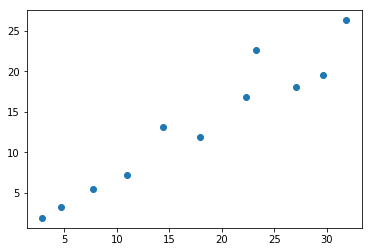

In [334]:
sqrt_mean=np.array(total["Mean sqrt"].iloc[:-2])
Std=np.array(total["Std"].iloc[:-2])
rr=np.random.uniform(23,36,4)
sqrt_mean=np.append(sqrt_mean,rr)
Std=np.append(Std,model(rr,0.76,-0.1)+np.random.normal(0,2,len(rr)))
plt.scatter(sqrt_mean,Std)

In [335]:
x_obs=sqrt_mean
y_obs=Std
x=np.linspace(min(x_obs),max(x_obs))
popt, pcov = curve_fit(model, x_obs, y_obs)
perr = np.sqrt(np.diag(pcov))
R_2=np.abs(pcov[1,0]/np.sqrt(pcov[0,0]*pcov[1,1]))

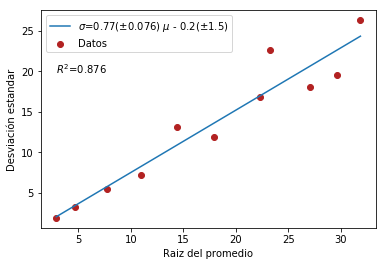

In [338]:
plt.scatter(sqrt_mean,Std,color="firebrick",label="Datos")
#total.plot("Mean sqrt","Log std",ax=ax)
plt.plot(x,model(x,popt[0],popt[1]),label=r"$\sigma$={}($\pm${}) $\mu$ {} {}($\pm${})".format(round(popt[0],2),
                                                                                round(perr[0],3),"+" if popt[1]>0 else "-",
                                                                                round(np.abs(popt[1]),2),round(perr[1],1)))
plt.text(min(x_obs), 0.75*max(y_obs), r'$R^2$={}'.format(round(R_2,3)))
plt.legend()
plt.xlabel("Raiz del promedio")
plt.ylabel("Desviación estandar")
plt.savefig("Figuras/sqrt_promedio_std.png")
plt.show()

In [339]:
d={"Intensidad":np.append(np.array(total.Intensidad),[11,12]),"Promedio":sqrt_mean**2,"Sqrt promedio":sqrt_mean,"Std":Std}

In [340]:
patos=pd.DataFrame(d)

In [341]:
patos.to_csv("Datos/Promedios.csv",index=False)
datos.to_csv("Datos/Conteos_verde.csv",index=False)